In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mh-house-prices/Participants_Data_HPP/sample_submission.csv
/kaggle/input/mh-house-prices/Participants_Data_HPP/Test.csv
/kaggle/input/mh-house-prices/Participants_Data_HPP/Train.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv("/kaggle/input/mh-house-prices/Participants_Data_HPP/Train.csv")
test = pd.read_csv("/kaggle/input/mh-house-prices/Participants_Data_HPP/Test.csv")
sub = pd.read_csv("/kaggle/input/mh-house-prices/Participants_Data_HPP/sample_submission.csv")

In [4]:
train.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [5]:
test.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE
0,Owner,0,0,1,BHK,545.171340,1,1,"Kamrej,Surat",21.262000,73.047700
1,Dealer,1,1,2,BHK,800.000000,0,0,"Panvel,Lalitpur",18.966114,73.148278
2,Dealer,0,0,2,BHK,1257.096513,1,1,"New Town,Kolkata",22.592200,88.484911
3,Dealer,0,0,3,BHK,1400.329489,1,1,"Kalwar Road,Jaipur",26.988300,75.584600
4,Owner,0,0,1,BHK,430.477830,1,1,"Mai Mandir,Nadiad",22.700000,72.870000


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


In [7]:
train.isnull().sum()

POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
ADDRESS                  0
LONGITUDE                0
LATITUDE                 0
TARGET(PRICE_IN_LACS)    0
dtype: int64

In [8]:
test.isnull().sum()

POSTED_BY             0
UNDER_CONSTRUCTION    0
RERA                  0
BHK_NO.               0
BHK_OR_RK             0
SQUARE_FT             0
READY_TO_MOVE         0
RESALE                0
ADDRESS               0
LONGITUDE             0
LATITUDE              0
dtype: int64

In [9]:
train["BHK_OR_RK"].value_counts()

BHK    29427
RK        24
Name: BHK_OR_RK, dtype: int64

In [10]:
train["POSTED_BY"].value_counts()

Dealer     18291
Owner      10538
Builder      622
Name: POSTED_BY, dtype: int64

In [11]:
#Conerting categorical variable to numeric

train['BHK_OR_RK']=train['BHK_OR_RK'].replace({'BHK':0,'RK':1})
train['POSTED_BY']=train['POSTED_BY'].replace({'Owner':0,'Dealer':1,'Builder':2})
test['BHK_OR_RK']=test['BHK_OR_RK'].replace({'BHK':0,'RK':1})
test['POSTED_BY']=test['POSTED_BY'].replace({'Owner':0,'Dealer':1,'Builder':2})

In [12]:
cat_col = train.select_dtypes(include=['object']).columns
num_col = train.select_dtypes(exclude=['object']).columns

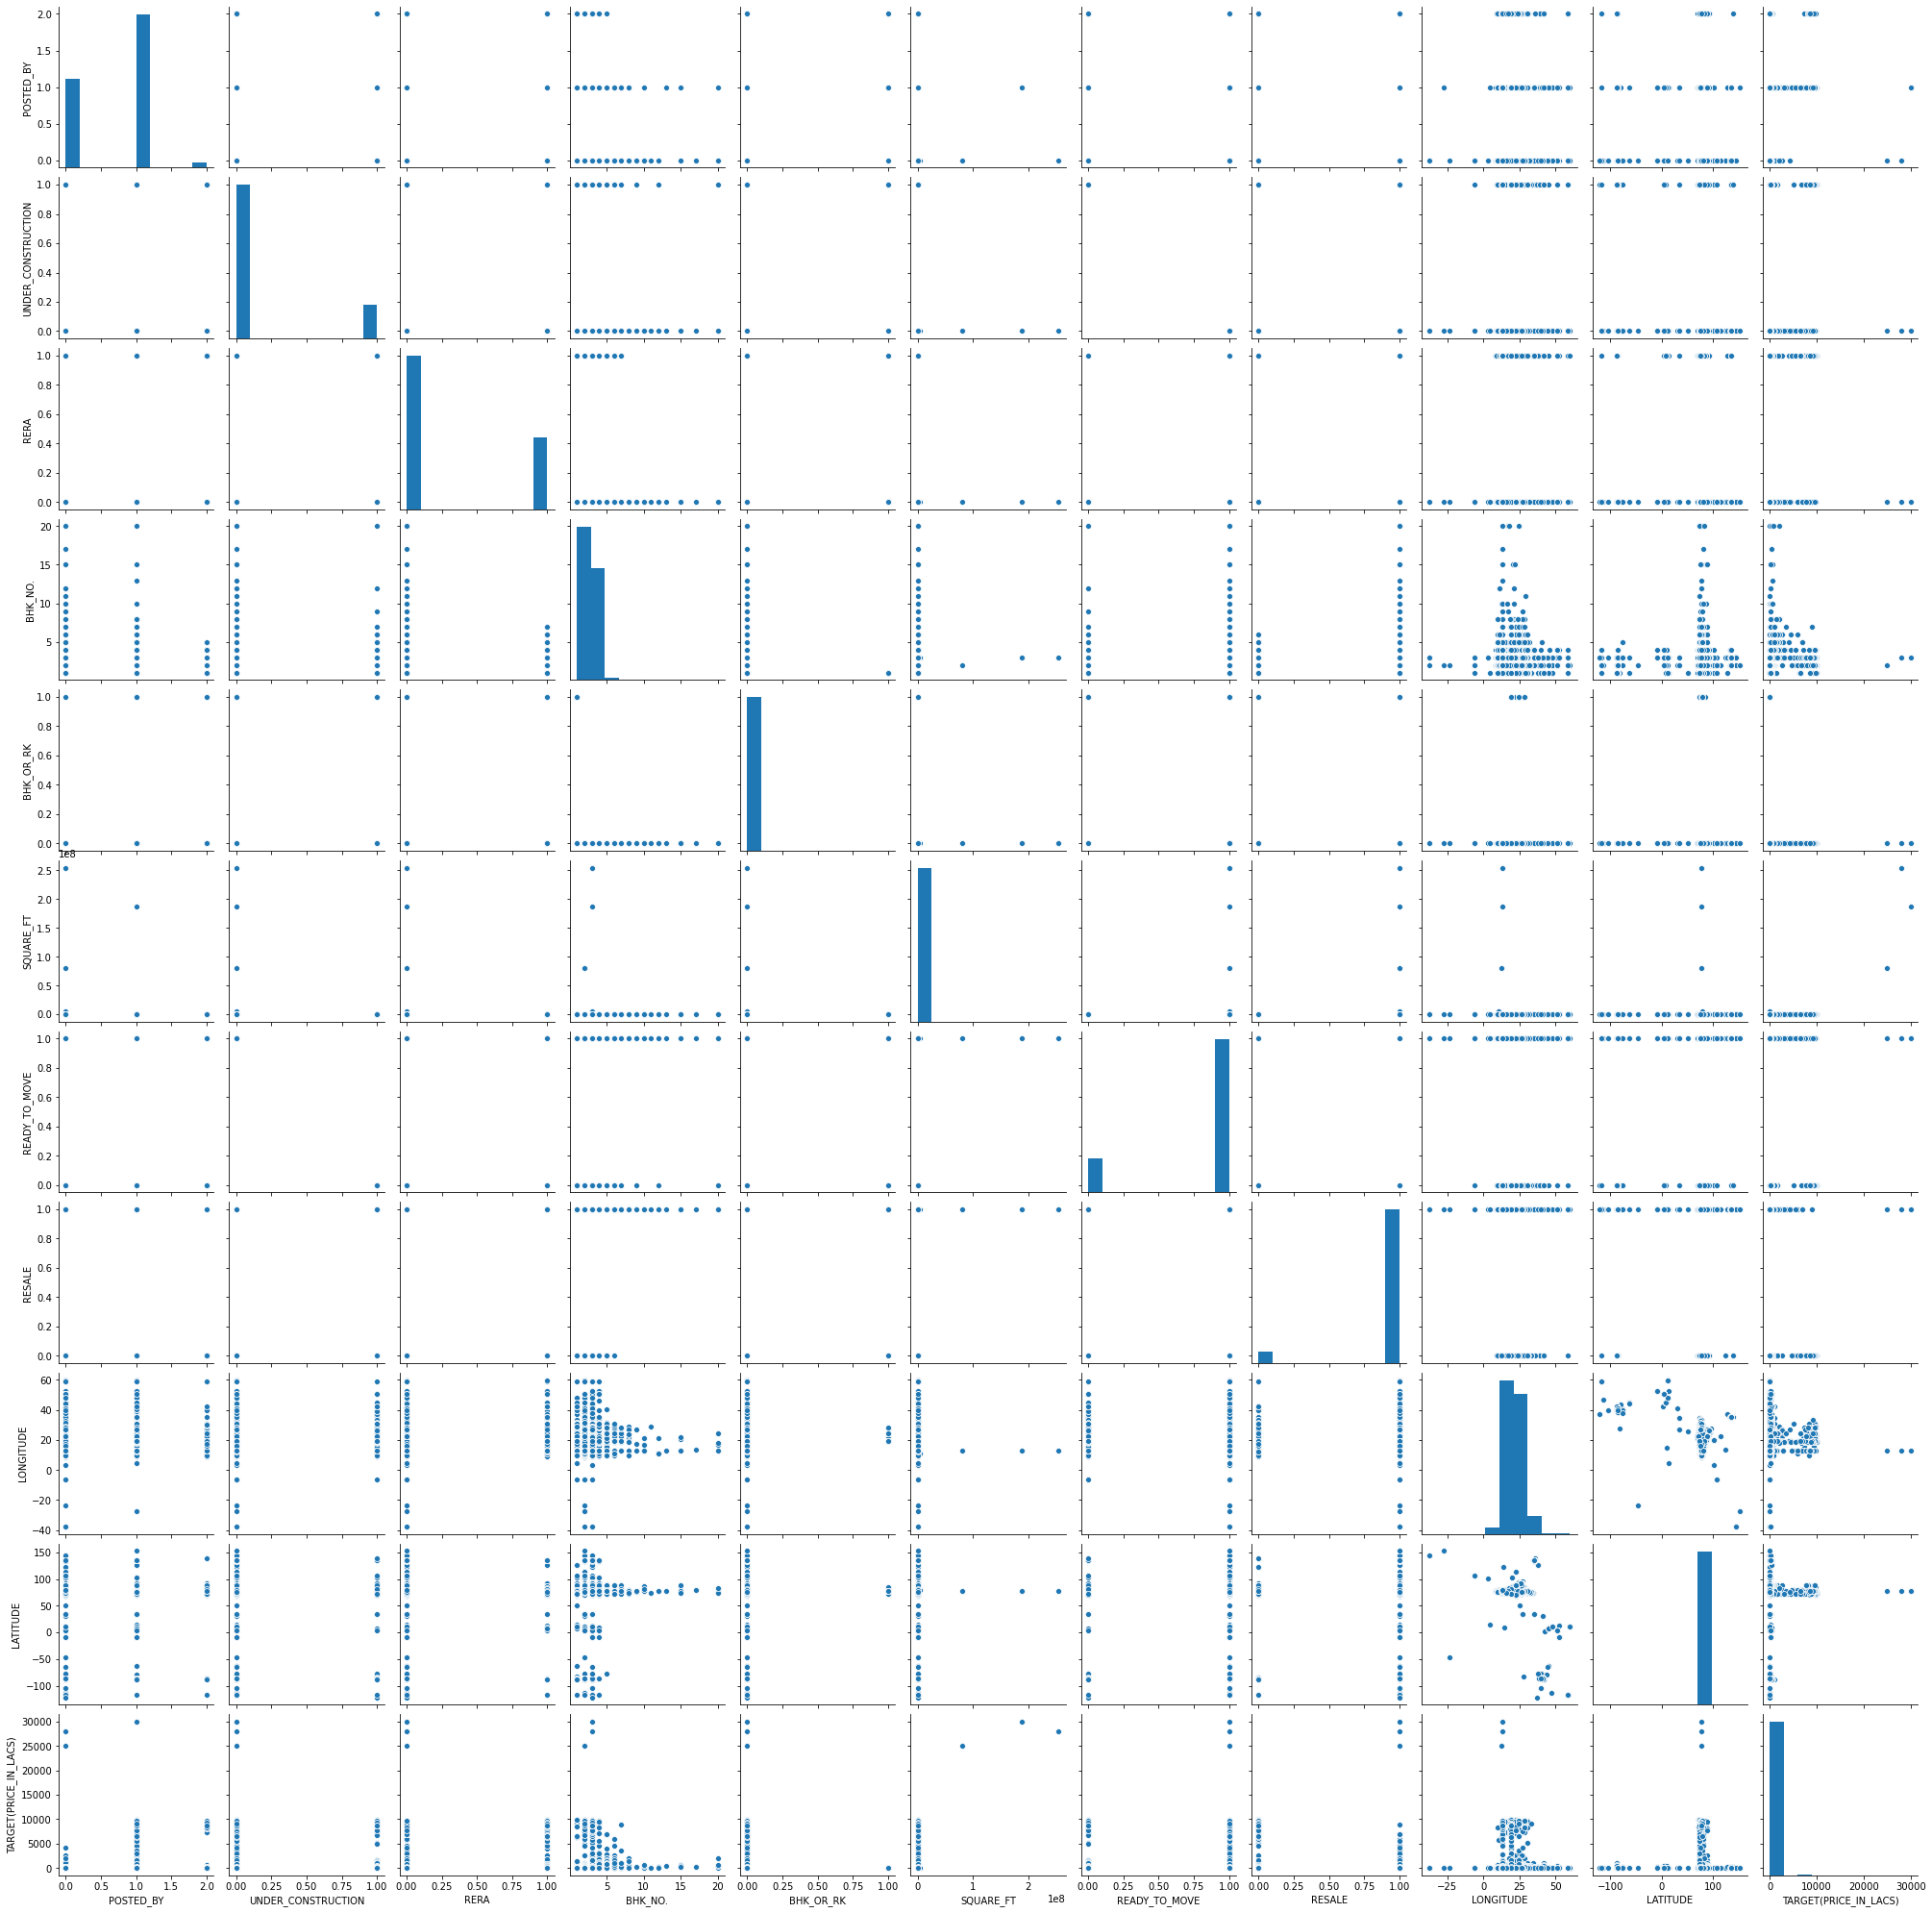

In [13]:
ax = sns.pairplot(train[num_col])

In [14]:
train.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,0,0,0,2,0,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,1,0,0,2,0,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,0,0,0,2,0,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,0,0,1,2,0,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,1,1,0,2,0,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [15]:
train['TARGET(PRICE_IN_LACS)']=np.log1p(train['TARGET(PRICE_IN_LACS)'])

In [16]:
train['TARGET(PRICE_IN_LACS)'].describe()


count    29451.000000
mean         4.230747
std          0.884970
min          0.223144
25%          3.663562
50%          4.143135
75%          4.615121
max         10.308986
Name: TARGET(PRICE_IN_LACS), dtype: float64

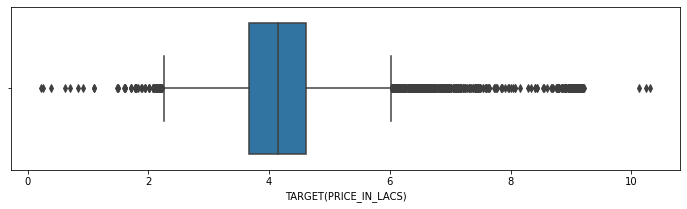

In [17]:
fig, ax = plt.subplots(figsize=(12, 3))
sns.boxplot(x='TARGET(PRICE_IN_LACS)', data=train)

In [18]:
#train = train[train["TARGET(PRICE_IN_LACS)"]<10]

In [19]:
'''def print_quantile_info(qu_dataset, qu_field):
    a = qu_dataset[qu_field].describe()
    
    iqr = a["75%"] - a["25%"]
    print("interquartile range:", iqr)
    
    upper_inner_fence = a["75%"] + 1.5 * iqr
    lower_inner_fence = a["25%"] - 1.5 * iqr
    print("upper_inner_fence:", upper_inner_fence)
    print("lower_inner_fence:", lower_inner_fence)
    
    upper_outer_fence = a["75%"] + 3 * iqr
    lower_outer_fence = a["25%"] - 3 * iqr
    print("upper_outer_fence:", upper_outer_fence)
    print("lower_outer_fence:", lower_outer_fence)
    
    count_over_upper = len(qu_dataset[qu_dataset[qu_field]>upper_inner_fence])
    count_under_lower = len(qu_dataset[qu_dataset[qu_field]<lower_inner_fence])
    percentage = 100 * (count_under_lower + count_over_upper) / a["count"]
    print("percentage of records out of inner fences: %.2f"% (percentage))
    
    count_over_upper = len(qu_dataset[qu_dataset[qu_field]>upper_outer_fence])
    count_under_lower = len(qu_dataset[qu_dataset[qu_field]<lower_outer_fence])
    percentage = 100 * (count_under_lower + count_over_upper) / a["count"]
    print("percentage of records out of outer fences: %.2f"% (percentage))'''

'def print_quantile_info(qu_dataset, qu_field):\n    a = qu_dataset[qu_field].describe()\n    \n    iqr = a["75%"] - a["25%"]\n    print("interquartile range:", iqr)\n    \n    upper_inner_fence = a["75%"] + 1.5 * iqr\n    lower_inner_fence = a["25%"] - 1.5 * iqr\n    print("upper_inner_fence:", upper_inner_fence)\n    print("lower_inner_fence:", lower_inner_fence)\n    \n    upper_outer_fence = a["75%"] + 3 * iqr\n    lower_outer_fence = a["25%"] - 3 * iqr\n    print("upper_outer_fence:", upper_outer_fence)\n    print("lower_outer_fence:", lower_outer_fence)\n    \n    count_over_upper = len(qu_dataset[qu_dataset[qu_field]>upper_inner_fence])\n    count_under_lower = len(qu_dataset[qu_dataset[qu_field]<lower_inner_fence])\n    percentage = 100 * (count_under_lower + count_over_upper) / a["count"]\n    print("percentage of records out of inner fences: %.2f"% (percentage))\n    \n    count_over_upper = len(qu_dataset[qu_dataset[qu_field]>upper_outer_fence])\n    count_under_lower = len(

In [20]:
#print_quantile_info(train, "TARGET(PRICE_IN_LACS)")

In [21]:
'''def remove_outliers_using_quantiles(qu_dataset, qu_field, qu_fence):
    a = qu_dataset[qu_field].describe()
    
    iqr = a["75%"] - a["25%"]
    print("interquartile range:", iqr)
    
    upper_inner_fence = a["75%"] + 1.5 * iqr
    lower_inner_fence = a["25%"] - 1.5 * iqr
    print("upper_inner_fence:", upper_inner_fence)
    print("lower_inner_fence:", lower_inner_fence)
    
    upper_outer_fence = a["75%"] + 3 * iqr
    lower_outer_fence = a["25%"] - 3 * iqr
    print("upper_outer_fence:", upper_outer_fence)
    print("lower_outer_fence:", lower_outer_fence)
    
    count_over_upper = len(qu_dataset[qu_dataset[qu_field]>upper_inner_fence])
    count_under_lower = len(qu_dataset[qu_dataset[qu_field]<lower_inner_fence])
    percentage = 100 * (count_under_lower + count_over_upper) / a["count"]
    print("percentage of records out of inner fences: %.2f"% (percentage))
    
    count_over_upper = len(qu_dataset[qu_dataset[qu_field]>upper_outer_fence])
    count_under_lower = len(qu_dataset[qu_dataset[qu_field]<lower_outer_fence])
    percentage = 100 * (count_under_lower + count_over_upper) / a["count"]
    print("percentage of records out of outer fences: %.2f"% (percentage))
    
    if qu_fence == "inner":
        output_dataset = qu_dataset[qu_dataset[qu_field]<=upper_inner_fence]
        output_dataset = output_dataset[output_dataset[qu_field]>=lower_inner_fence]
    elif qu_fence == "outer":
        output_dataset = qu_dataset[qu_dataset[qu_field]<=upper_outer_fence]
        output_dataset = output_dataset[output_dataset[qu_field]>=lower_outer_fence]
    else:
        output_dataset = qu_dataset
    
    print("length of input dataframe:", len(qu_dataset))
    print("length of new dataframe after outlier removal:", len(output_dataset))
    
    return output_dataset'''

'def remove_outliers_using_quantiles(qu_dataset, qu_field, qu_fence):\n    a = qu_dataset[qu_field].describe()\n    \n    iqr = a["75%"] - a["25%"]\n    print("interquartile range:", iqr)\n    \n    upper_inner_fence = a["75%"] + 1.5 * iqr\n    lower_inner_fence = a["25%"] - 1.5 * iqr\n    print("upper_inner_fence:", upper_inner_fence)\n    print("lower_inner_fence:", lower_inner_fence)\n    \n    upper_outer_fence = a["75%"] + 3 * iqr\n    lower_outer_fence = a["25%"] - 3 * iqr\n    print("upper_outer_fence:", upper_outer_fence)\n    print("lower_outer_fence:", lower_outer_fence)\n    \n    count_over_upper = len(qu_dataset[qu_dataset[qu_field]>upper_inner_fence])\n    count_under_lower = len(qu_dataset[qu_dataset[qu_field]<lower_inner_fence])\n    percentage = 100 * (count_under_lower + count_over_upper) / a["count"]\n    print("percentage of records out of inner fences: %.2f"% (percentage))\n    \n    count_over_upper = len(qu_dataset[qu_dataset[qu_field]>upper_outer_fence])\n    co

In [22]:
#train = remove_outliers_using_quantiles(train, "TARGET(PRICE_IN_LACS)", "inner")

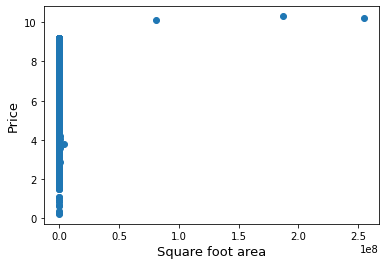

In [23]:
fig,ax = plt.subplots()
ax.scatter(train["SQUARE_FT"],train["TARGET(PRICE_IN_LACS)"])
plt.ylabel('Price', fontsize=13)
plt.xlabel('Square foot area', fontsize=13)
plt.show()


In [24]:
#train = train.drop(train[(train['TARGET(PRICE_IN_LACS)']>10)].index)

In [25]:
#train = train.drop(train[(train['SQUARE_FT']>250000)].index)

In [26]:
train.describe().T
test.describe().T

,count,mean,std,min,25%,50%,75%,max
POSTED_BY,68720.0,0.657203,0.514742,0.000000,0.000000,1.000000,1.000000,2.000000e+00
UNDER_CONSTRUCTION,68720.0,0.176557,0.381296,0.000000,0.000000,0.000000,0.000000,1.000000e+00
RERA,68720.0,0.316531,0.465126,0.000000,0.000000,0.000000,1.000000,1.000000e+00
BHK_NO.,68720.0,2.388198,0.864577,1.000000,2.000000,2.000000,3.000000,3.100000e+01
BHK_OR_RK,68720.0,0.000844,0.029040,0.000000,0.000000,0.000000,0.000000,1.000000e+00
SQUARE_FT,68720.0,2762.418558,164099.148524,1.000000,900.031031,1174.981923,1550.264643,4.016393e+07
READY_TO_MOVE,68720.0,0.823443,0.381296,0.000000,1.000000,1.000000,1.000000,1.000000e+00
RESALE,68720.0,0.933498,0.249159,0.000000,1.000000,1.000000,1.000000,1.000000e+00
LONGITUDE,68720.0,21.288045,6.179034,-38.391261,18.452663,20.933260,26.888396,6.518333e+01
LATITUDE,68720.0,76.919388,10.100950,-118.354100,73.798100,77.324966,78.000723,1.752780e+02


In [27]:
import re
def rep(text):
 text_new=(re.sub("[^a-zA-Z]", " ", text))
 return text_new
def city(address):
 city_name=address.split()[-1]
 return city_name

In [28]:
train['ADDRESS']=train['ADDRESS'].apply(lambda x : rep(x))
train['CITY']=train['ADDRESS'].apply(lambda x : city(x))

test['ADDRESS']=test['ADDRESS'].apply(lambda x : rep(x))
test['CITY']=test['ADDRESS'].apply(lambda x : city(x))

In [29]:
Encoding = train.groupby('CITY')['TARGET(PRICE_IN_LACS)'].mean()
train['CITY']= train.CITY.map(Encoding )
test['CITY']= test.CITY.map(Encoding )

In [30]:
train.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),CITY
0,0,0,0,2,0,1300.236407,1,1,Ksfc Layout Bangalore,12.969910,77.597960,4.025352,4.456091
1,1,0,0,2,0,1275.000000,1,1,Vishweshwara Nagar Mysore,12.274538,76.644605,3.951244,4.097937
2,0,0,0,2,0,933.159722,1,1,Jigani Bangalore,12.778033,77.632191,3.784190,4.456091
3,0,0,1,2,0,929.921143,1,1,Sector Vaishali Ghaziabad,28.642300,77.344500,4.151040,3.840646
4,1,1,0,2,0,999.009247,0,1,New Town Kolkata,22.592200,88.484911,4.119037,4.003438


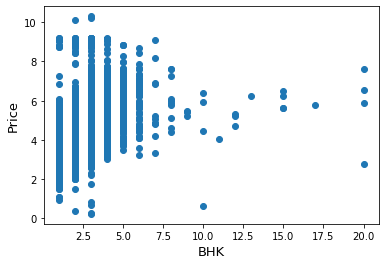

In [31]:
fig,ax = plt.subplots()
ax.scatter(train["BHK_NO."],train["TARGET(PRICE_IN_LACS)"])
plt.ylabel('Price', fontsize=13)
plt.xlabel('BHK', fontsize=13)
plt.show()


In [32]:
train['SQ_FT/ROOM']=train['SQUARE_FT']/train['BHK_NO.']
test['SQ_FT/ROOM']=test['SQUARE_FT']/test['BHK_NO.']

In [33]:
corr = train.corr()

print (corr['TARGET(PRICE_IN_LACS)'].sort_values(ascending=False)[:5], '\n')
print (corr['TARGET(PRICE_IN_LACS)'].sort_values(ascending=False)[-5:])

TARGET(PRICE_IN_LACS)    1.000000
CITY                     0.553560
BHK_NO.                  0.479669
POSTED_BY                0.311873
RERA                     0.142783
Name: TARGET(PRICE_IN_LACS), dtype: float64 

BHK_OR_RK       -0.021759
READY_TO_MOVE   -0.048011
LATITUDE        -0.062802
RESALE          -0.095394
LONGITUDE       -0.128566
Name: TARGET(PRICE_IN_LACS), dtype: float64


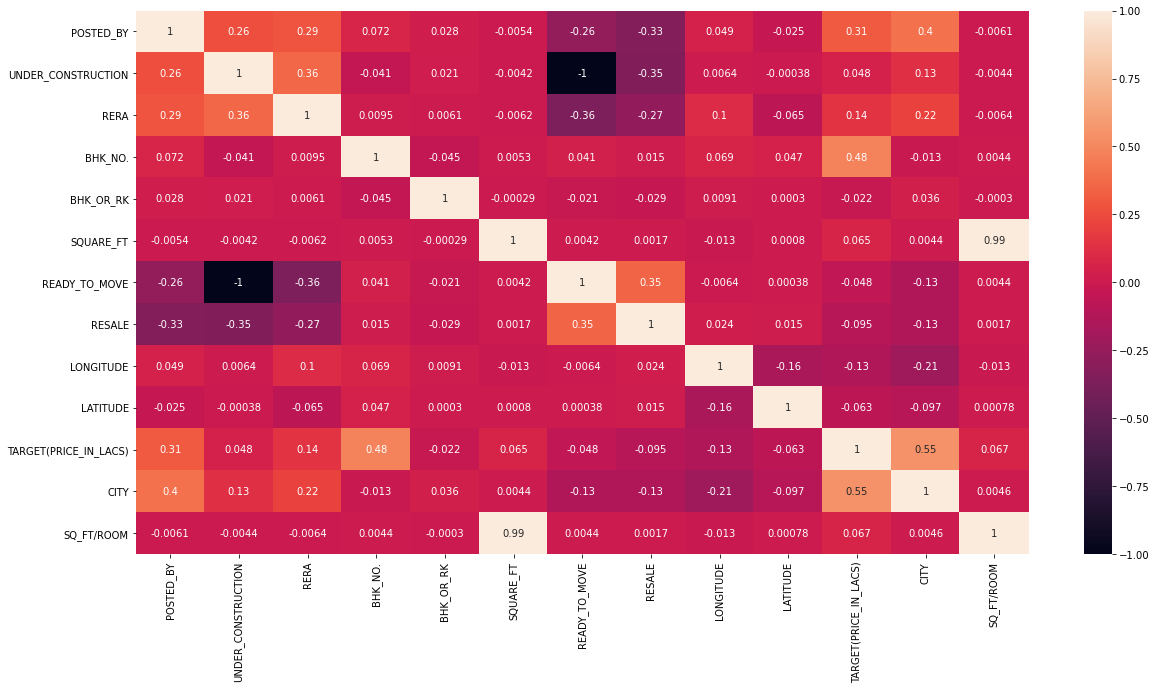

In [34]:
plt.figure(figsize=(20,10))
corr=train.corr()
sns.heatmap(corr,annot=True)


In [35]:
train.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),CITY,SQ_FT/ROOM
0,0,0,0,2,0,1300.236407,1,1,Ksfc Layout Bangalore,12.969910,77.597960,4.025352,4.456091,650.118204
1,1,0,0,2,0,1275.000000,1,1,Vishweshwara Nagar Mysore,12.274538,76.644605,3.951244,4.097937,637.500000
2,0,0,0,2,0,933.159722,1,1,Jigani Bangalore,12.778033,77.632191,3.784190,4.456091,466.579861
3,0,0,1,2,0,929.921143,1,1,Sector Vaishali Ghaziabad,28.642300,77.344500,4.151040,3.840646,464.960571
4,1,1,0,2,0,999.009247,0,1,New Town Kolkata,22.592200,88.484911,4.119037,4.003438,499.504623


In [36]:
test.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,CITY,SQ_FT/ROOM
0,0,0,0,1,0,545.171340,1,1,Kamrej Surat,21.262000,73.047700,3.771845,545.171340
1,1,1,1,2,0,800.000000,0,0,Panvel Lalitpur,18.966114,73.148278,4.840878,400.000000
2,1,0,0,2,0,1257.096513,1,1,New Town Kolkata,22.592200,88.484911,4.003438,628.548257
3,1,0,0,3,0,1400.329489,1,1,Kalwar Road Jaipur,26.988300,75.584600,3.722582,466.776496
4,0,0,0,1,0,430.477830,1,1,Mai Mandir Nadiad,22.700000,72.870000,3.046038,430.477830


In [37]:
cat_col=['POSTED_BY', 'UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'BHK_OR_RK', 'RESALE']

In [38]:
# Removed ADDRESS and READY_TO_MOVE

col=['POSTED_BY', 'UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'BHK_OR_RK', 'SQUARE_FT','LONGITUDE', 'LATITUDE','RESALE','CITY','SQ_FT/ROOM']
x=train[col]
test_X=test[col]
y=train['TARGET(PRICE_IN_LACS)']

In [39]:
print(x.shape , y.shape , test_X.shape)

(29451, 11) (29451,) (68720, 11)


In [40]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.metrics import mean_squared_error as mse

In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state = 150303 ,shuffle=True)

In [42]:
print(x_train.shape,x_test.shape)

(20615, 11) (8836, 11)


Random Forest

In [43]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]


# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [44]:
rf = RandomForestRegressor()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
/opt/conda/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 10.3min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 47.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 94.1min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [45]:
rf_random.best_params_

{'n_estimators': 2000,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 100,
 'bootstrap': True}

In [46]:
# Random Forest with Tuned Parameter

rfc = RandomForestRegressor(n_estimators = 800, min_samples_split = 5, min_samples_leaf = 1, max_features = 'sqrt', max_depth = 40, bootstrap = True)
rfc.fit(x_train,y_train)

RandomForestRegressor(max_depth=40, max_features='sqrt', min_samples_split=5,
                      n_estimators=800)

In [47]:
y_pred = rfc.predict(x_test)

In [48]:
from sklearn.metrics import mean_squared_error as mse
print(np.sqrt(mse(y_test,y_pred)))

0.3187510049641349


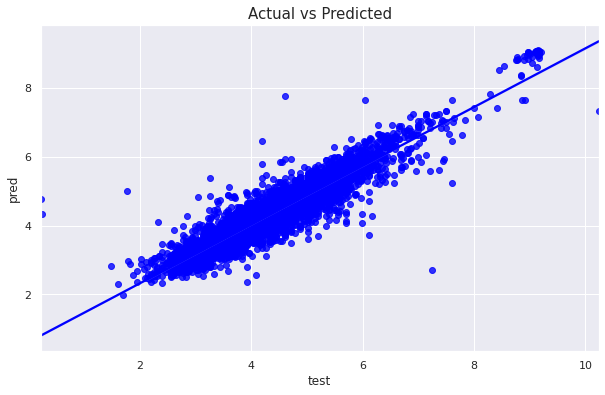

In [49]:
sns.set()
plt.figure(figsize = (10,6))
sns.regplot(data = train, x = y_test , y = y_pred,ci = 68,color = "blue")
plt.xlabel("test", fontsize = 12)
plt.ylabel("pred", fontsize = 12 )
_= plt.title("Actual vs Predicted", fontsize = 15)

In [50]:
test_X.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,LONGITUDE,LATITUDE,RESALE,CITY,SQ_FT/ROOM
0,0,0,0,1,0,545.171340,21.262000,73.047700,1,3.771845,545.171340
1,1,1,1,2,0,800.000000,18.966114,73.148278,0,4.840878,400.000000
2,1,0,0,2,0,1257.096513,22.592200,88.484911,1,4.003438,628.548257
3,1,0,0,3,0,1400.329489,26.988300,75.584600,1,3.722582,466.776496
4,0,0,0,1,0,430.477830,22.700000,72.870000,1,3.046038,430.477830


In [51]:
'''rfc.fit(x, y)
pred = rfc.predict(test_X)
sub['TARGET(PRICE_IN_LACS)']=np.abs((np.exp(lgb_pred)-1))
sub.to_csv('sub.csv',index=False)
from IPython.display import FileLink
FileLink(r'sub.csv')'''

"rfc.fit(x, y)\npred = rfc.predict(test_X)\nsub['TARGET(PRICE_IN_LACS)']=np.abs((np.exp(lgb_pred)-1))\nsub.to_csv('sub.csv',index=False)\nfrom IPython.display import FileLink\nFileLink(r'sub.csv')"

XG - Boosting

In [52]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [53]:
model_xgb.fit(x_train,y_train)
y_pred = model_xgb.predict(x_test)


[08:12:57] WARNING: /workspace/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [54]:
from sklearn.metrics import mean_squared_error as mse
print(np.sqrt(mse(y_test,y_pred)))

0.3652212163836157


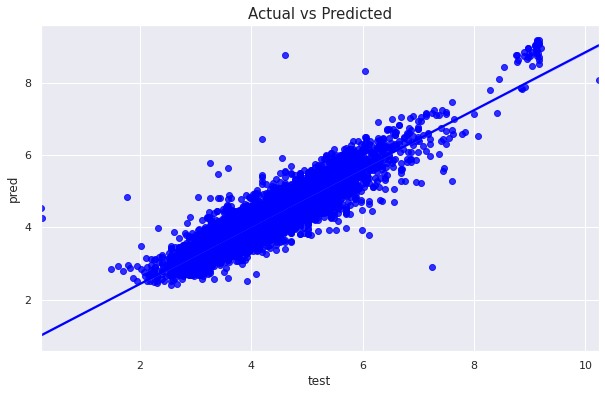

In [55]:
sns.set()
plt.figure(figsize = (10,6))
sns.regplot(data = train, x = y_test , y = y_pred,ci = 68,color = "blue")
plt.xlabel("test", fontsize = 12)
plt.ylabel("pred", fontsize = 12 )
_= plt.title("Actual vs Predicted", fontsize = 15)

In [56]:
test_X.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,LONGITUDE,LATITUDE,RESALE,CITY,SQ_FT/ROOM
0,0,0,0,1,0,545.171340,21.262000,73.047700,1,3.771845,545.171340
1,1,1,1,2,0,800.000000,18.966114,73.148278,0,4.840878,400.000000
2,1,0,0,2,0,1257.096513,22.592200,88.484911,1,4.003438,628.548257
3,1,0,0,3,0,1400.329489,26.988300,75.584600,1,3.722582,466.776496
4,0,0,0,1,0,430.477830,22.700000,72.870000,1,3.046038,430.477830


In [57]:
'''model_xgb.fit(x, y)
pred = model_xgb.predict(test_X)
sub['TARGET(PRICE_IN_LACS)']=np.abs((np.exp(lgb_pred)-1))
sub.to_csv('sub.csv',index=False)
from IPython.display import FileLink
FileLink(r'sub.csv')'''

"model_xgb.fit(x, y)\npred = model_xgb.predict(test_X)\nsub['TARGET(PRICE_IN_LACS)']=np.abs((np.exp(lgb_pred)-1))\nsub.to_csv('sub.csv',index=False)\nfrom IPython.display import FileLink\nFileLink(r'sub.csv')"

Gradient Boosting

In [58]:
modelxg =  GradientBoostingRegressor(alpha=0.999, criterion='friedman_mse', init=None,
                          learning_rate=0.061, loss='huber', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=4, min_samples_split=4,
                          min_weight_fraction_leaf=0.0, n_estimators=102,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [59]:
modelxg.fit(x_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:309: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter. We also recommend using HistGradientBoosting models instead.
  FutureWarning)


GradientBoostingRegressor(alpha=0.999, learning_rate=0.061, loss='huber',
                          min_samples_leaf=4, min_samples_split=4,
                          n_estimators=102, presort='auto')

In [60]:
y_pred = modelxg.predict(x_test)

In [61]:
from sklearn.metrics import mean_squared_error as mse
print(np.sqrt(mse(y_test,y_pred)))

0.37054829040936726


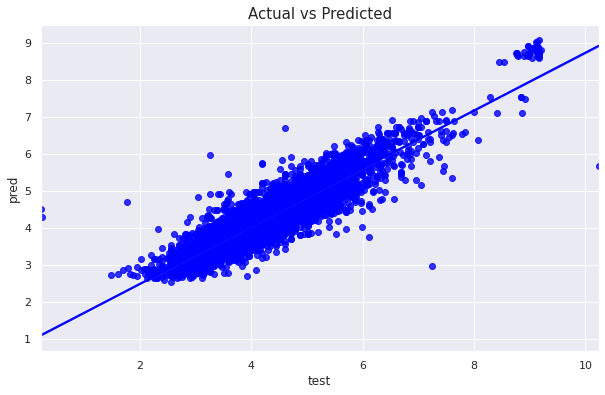

In [62]:
sns.set()
plt.figure(figsize = (10,6))
sns.regplot(data = train, x = y_test , y = y_pred,ci = 68,color = "blue")
plt.xlabel("test", fontsize = 12)
plt.ylabel("pred", fontsize = 12 )
_= plt.title("Actual vs Predicted", fontsize = 15)

In [63]:
test_X.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,LONGITUDE,LATITUDE,RESALE,CITY,SQ_FT/ROOM
0,0,0,0,1,0,545.171340,21.262000,73.047700,1,3.771845,545.171340
1,1,1,1,2,0,800.000000,18.966114,73.148278,0,4.840878,400.000000
2,1,0,0,2,0,1257.096513,22.592200,88.484911,1,4.003438,628.548257
3,1,0,0,3,0,1400.329489,26.988300,75.584600,1,3.722582,466.776496
4,0,0,0,1,0,430.477830,22.700000,72.870000,1,3.046038,430.477830


In [64]:
'''modelxg.fit(x, y)
pred = modelxg.predict(test_X)
sub['TARGET(PRICE_IN_LACS)']=np.abs((np.exp(lgb_pred)-1))
sub.to_csv('sub.csv',index=False)
from IPython.display import FileLink
FileLink(r'sub.csv')'''

"modelxg.fit(x, y)\npred = modelxg.predict(test_X)\nsub['TARGET(PRICE_IN_LACS)']=np.abs((np.exp(lgb_pred)-1))\nsub.to_csv('sub.csv',index=False)\nfrom IPython.display import FileLink\nFileLink(r'sub.csv')"

H2O AI

In [65]:
print(train.shape,test.shape)

(29451, 14) (68720, 13)


In [66]:
train.head()


,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),CITY,SQ_FT/ROOM
0,0,0,0,2,0,1300.236407,1,1,Ksfc Layout Bangalore,12.969910,77.597960,4.025352,4.456091,650.118204
1,1,0,0,2,0,1275.000000,1,1,Vishweshwara Nagar Mysore,12.274538,76.644605,3.951244,4.097937,637.500000
2,0,0,0,2,0,933.159722,1,1,Jigani Bangalore,12.778033,77.632191,3.784190,4.456091,466.579861
3,0,0,1,2,0,929.921143,1,1,Sector Vaishali Ghaziabad,28.642300,77.344500,4.151040,3.840646,464.960571
4,1,1,0,2,0,999.009247,0,1,New Town Kolkata,22.592200,88.484911,4.119037,4.003438,499.504623


In [67]:
import h2o
h2o.init(ip="localhost", port=54323)

Checking whether there is an H2O instance running at http://localhost:54323 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.8" 2020-07-14; OpenJDK Runtime Environment (build 11.0.8+10-post-Ubuntu-0ubuntu118.04.1); OpenJDK 64-Bit Server VM (build 11.0.8+10-post-Ubuntu-0ubuntu118.04.1, mixed mode, sharing)
  Starting server from /opt/conda/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpodl12r5y
  JVM stdout: /tmp/tmpodl12r5y/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpodl12r5y/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54323
Connecting to H2O server at http://127.0.0.1:54323 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.7
H2O_cluster_version_age:,2 months and 18 days
H2O_cluster_name:,H2O_from_python_unknownUser_5fgbla
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,4 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"accepting new members, healthy"


In [68]:
train_h2o = h2o.H2OFrame(train)
test_h2o = h2o.H2OFrame(test)

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [69]:
y = 'TARGET(PRICE_IN_LACS)'

In [70]:
X = list(train.columns)
X.remove('READY_TO_MOVE')
X.remove(y)

In [71]:
X

['POSTED_BY',
 'UNDER_CONSTRUCTION',
 'RERA',
 'BHK_NO.',
 'BHK_OR_RK',
 'SQUARE_FT',
 'RESALE',
 'ADDRESS',
 'LONGITUDE',
 'LATITUDE',
 'CITY',
 'SQ_FT/ROOM']

In [72]:
from h2o.automl import H2OAutoML
aml = H2OAutoML(max_runtime_secs=300, seed = 1)
aml.train(x = X, y = y, training_frame = train_h2o)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [73]:
lb = aml.leaderboard
lb.head()
lb.head(rows=lb.nrows)

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
StackedEnsemble_BestOfFamily_AutoML_20201010_081325,0.0917076,0.302833,0.0917076,0.205181,0.0605646
StackedEnsemble_AllModels_AutoML_20201010_081325,0.0917102,0.302837,0.0917102,0.205183,0.0605655
GBM_grid__1_AutoML_20201010_081325_model_2,0.0934162,0.305641,0.0934162,0.206252,0.0609308
XGBoost_grid__1_AutoML_20201010_081325_model_1,0.103941,0.322398,0.103941,0.225423,0.0649481
GBM_4_AutoML_20201010_081325,0.118295,0.34394,0.118295,0.237889,0.0670769
GBM_3_AutoML_20201010_081325,0.122274,0.349676,0.122274,0.24391,0.0680986
XGBoost_grid__1_AutoML_20201010_081325_model_2,0.125729,0.354582,0.125729,0.253208,0.0700709
XGBoost_3_AutoML_20201010_081325,0.128674,0.358712,0.128674,0.256193,0.0707266
GBM_2_AutoML_20201010_081325,0.132566,0.364096,0.132566,0.254185,0.0703806
GBM_1_AutoML_20201010_081325,0.139389,0.373348,0.139389,0.267382,0.0728339


In [74]:
test_h2o = test_h2o.drop(['READY_TO_MOVE'])

In [75]:
test_h2o.head()

POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,RESALE,ADDRESS,LONGITUDE,LATITUDE,CITY,SQ_FT/ROOM
0,0,0,1,0,545.171,1,Kamrej Surat,21.262,73.0477,3.77185,545.171
1,1,1,2,0,800,0,Panvel Lalitpur,18.9661,73.1483,4.84088,400
1,0,0,2,0,1257.1,1,New Town Kolkata,22.5922,88.4849,4.00344,628.548
1,0,0,3,0,1400.33,1,Kalwar Road Jaipur,26.9883,75.5846,3.72258,466.776
0,0,0,1,0,430.478,1,Mai Mandir Nadiad,22.7,72.87,3.04604,430.478
0,0,0,2,0,500,1,Elora Park Vadodara,21.7164,73.0041,3.55095,250
1,0,0,1,0,724.836,1,Shirgaon Maharashtra,19.032,73.6215,4.94923,724.836
1,1,1,1,0,778.843,1,Anjurdive Mumbai,18.9667,72.8333,4.92169,778.843
1,0,0,1,0,600.056,1,Rambaug Maharashtra,19.2438,73.1347,4.94923,600.056
1,0,0,2,0,1323.59,1,Borivali West Lalitpur,19.2361,72.8338,4.84088,661.796


In [76]:
pred=aml.leader.predict(test_h2o)

stackedensemble prediction progress: |████████████████████████████████████| 100%


/opt/conda/lib/python3.7/site-packages/h2o/job.py:70: UserWarning: Test/Validation dataset column 'ADDRESS' has levels not trained on: [     Ganga Sankul Apt macchisath near Sathkhiradi  Amravati,     Feet Alwar,     HDA Flat Complex Basudevpur Haldia,     Railway Lines   Solapur,     feet road Vijayawada,     kalipur road haridevpur Kolkata,    Godown Jaipur,    Main Road    th Phase  J P  Nagar Bangalore,    NEW JAGNATH Rajkot,    No Naka Wadi Lalitpur,    Ramaiah Layout Bangalore,    laxmi colony  opp laxmi mandir cinema jaipur Jaipur,    th Milestone Road Ajmer Jaipur Expressway Jaipur,   Km From DELHI Ghaziabad,   june Road Panaji,  NAME  Chennai,  nd Block Hbr Layout Bangalore,  nd Cross  Prashanthi Nagar  K Narayanapura Main Road Bangalore,  nd line haranatha puram Nellore,  near Post Office Morbi,  rd Block Hrbr Layout Bangalore,  rd Block Koramangala Bangalore,  rd Phase Iti Layout Bangalore,  rd Stage Vinayaka Layout Bangalore,  st Block BEL Layout Bangalore,  st Stage Indira

In [77]:
pred

predict
2.69748
4.27027
4.16198
3.52421
2.50301
2.95727
4.15205
3.87366
3.84643
5.51987


In [78]:
pred = pred.as_data_frame()

In [79]:
pred.head()

,predict
0,2.697478
1,4.270272
2,4.161975
3,3.524212
4,2.503011


In [80]:
pred = np.abs((np.exp(pred)-1))
pred = round(pred,1)

In [81]:
pred

,predict
0,13.8
1,70.5
2,63.2
3,32.9
4,11.2
...,...
68715,107.8
68716,111.8
68717,9516.5
68718,82.7


In [82]:
pred.to_csv('submission0.csv',header=['TARGET(PRICE_IN_LACS)'],index=False)
from IPython.display import FileLink
FileLink(r'submission0.csv')

/kaggle/working/submission0.csv

Light GBM

In [83]:
import lightgbm as lgb
from sklearn.model_selection import KFold

In [84]:
from lightgbm import LGBMRegressor
lgbcl = LGBMRegressor(max_depth=-1,n_estimators=2000, importance_type='gain')
lgbcl= lgbcl.fit(x_train,y_train,categorical_feature=cat_col,eval_set=(x_test, y_test),verbose=100,early_stopping_rounds=50)
y_predict = lgbcl.predict(x_test)
mse(y_test,y_predict)
np.sqrt(mse(y_test,y_predict))

/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['BHK_NO.', 'BHK_OR_RK', 'POSTED_BY', 'RERA', 'RESALE', 'UNDER_CONSTRUCTION']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 50 rounds
[100]	valid_0's l2: 0.10293
[200]	valid_0's l2: 0.097429
[300]	valid_0's l2: 0.0948048
[400]	valid_0's l2: 0.0936033
[500]	valid_0's l2: 0.0930548
[600]	valid_0's l2: 0.0927266
[700]	valid_0's l2: 0.0925416
Early stopping, best iteration is:
[720]	valid_0's l2: 0.0924363


0.30403337459695673

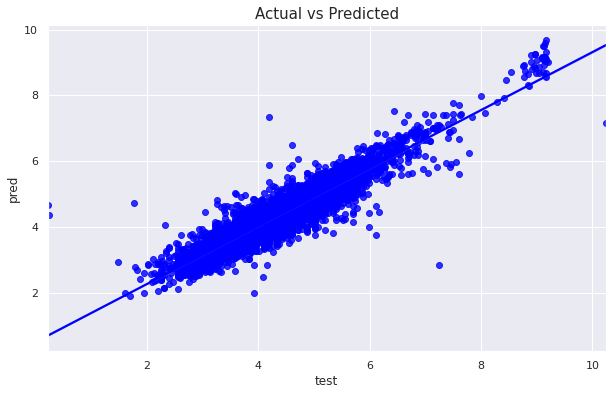

In [85]:
sns.set()
plt.figure(figsize = (10,6))
sns.regplot(data = train, x = y_test , y = y_predict,ci = 68,color = "blue")
plt.xlabel("test", fontsize = 12)
plt.ylabel("pred", fontsize = 12 )
_= plt.title("Actual vs Predicted", fontsize = 15)

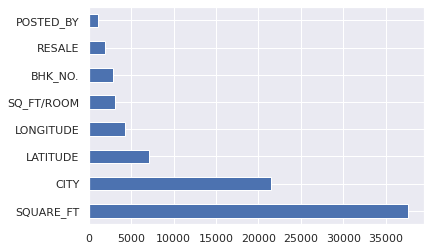

In [86]:
feat_importances = pd.Series(lgbcl.feature_importances_, index=x_train.columns)
feat_importances.nlargest(8).plot(kind='barh')
plt.show()

In [87]:
test_X.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,LONGITUDE,LATITUDE,RESALE,CITY,SQ_FT/ROOM
0,0,0,0,1,0,545.171340,21.262000,73.047700,1,3.771845,545.171340
1,1,1,1,2,0,800.000000,18.966114,73.148278,0,4.840878,400.000000
2,1,0,0,2,0,1257.096513,22.592200,88.484911,1,4.003438,628.548257
3,1,0,0,3,0,1400.329489,26.988300,75.584600,1,3.722582,466.776496
4,0,0,0,1,0,430.477830,22.700000,72.870000,1,3.046038,430.477830


In [88]:
lgbcl= lgbcl.fit(x, y)
lgb_pred = lgbcl.predict(test_X)

TypeError: Wrong type(str) for label.
It should be list, numpy 1-D array or pandas Series

In [89]:
sub['TARGET(PRICE_IN_LACS)']=np.abs((np.exp(lgb_pred)-1))
sub.to_csv('sub_lgb14.csv',index=False)
from IPython.display import FileLink
FileLink(r'sub_lgb14.csv')

NameError: name 'lgb_pred' is not defined